# WeatherPy

----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"units": "imperial", "appid": api_key}

# Create loop
counter = 0
for city in cities:
    params['q'] = city
    if counter == 5:
        break
    response = requests.get(base_url, params = params)
    print(response)
    counter = counter + 1

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [4]:
# Create df
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [5]:
# Create loop
record_count = 1
for i, city in enumerate(cities): 
    params["q"] = city
    
    if (i % 60 == 0 and i > 50):
        record_count = 1
        
    try:
        print(f"Processing Record {record_count} | {city}")
        response = requests.get(base_url, params = params).json()
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              

    except:
        print(f"City not found. Skipping...") 
    record_count += 1
             
print("Data retrieval finished")

Processing Record 1 | barrow
Processing Record 2 | bonavista
Processing Record 3 | rikitea
Processing Record 4 | puquio
Processing Record 5 | port alfred
Processing Record 6 | saint george
Processing Record 7 | beringovskiy
Processing Record 8 | san pedro
Processing Record 9 | kapaa
Processing Record 10 | hamilton
Processing Record 11 | severo-kurilsk
Processing Record 12 | esperance
Processing Record 13 | bluff
Processing Record 14 | puerto ayora
Processing Record 15 | yellowknife
Processing Record 16 | mar del plata
Processing Record 17 | hilo
Processing Record 18 | mahebourg
Processing Record 19 | mataura
Processing Record 20 | ushuaia
Processing Record 21 | atuona
Processing Record 22 | sinnamary
Processing Record 23 | kodiak
Processing Record 24 | lethem
Processing Record 25 | beira
Processing Record 26 | vaini
Processing Record 27 | qaanaaq
Processing Record 28 | kaitangata
Processing Record 29 | avarua
Processing Record 30 | ewa beach
Processing Record 31 | bredasdorp
Processing

City not found. Skipping...
Processing Record 59 | napasar
Processing Record 60 | victoria
Processing Record 1 | belyy yar
Processing Record 2 | kavieng
Processing Record 3 | balikpapan
Processing Record 4 | wilmington
Processing Record 5 | chauk
Processing Record 6 | ratnagiri
Processing Record 7 | dodge city
Processing Record 8 | hovd
Processing Record 9 | syracuse
Processing Record 10 | westport
Processing Record 11 | kearney
Processing Record 12 | richards bay
Processing Record 13 | yumen
Processing Record 14 | aquiraz
Processing Record 15 | trinidad
Processing Record 16 | jizan
Processing Record 17 | igarka
Processing Record 18 | kargasok
Processing Record 19 | cherskiy
Processing Record 20 | batticaloa
Processing Record 21 | hutchinson
Processing Record 22 | tiksi
Processing Record 23 | sile
Processing Record 24 | kangaatsiaq
Processing Record 25 | barentsburg
City not found. Skipping...
Processing Record 26 | el alto
Processing Record 27 | sault sainte marie
Processing Record 28

Processing Record 58 | bose
Processing Record 59 | vila franca do campo
Processing Record 60 | lieksa
Processing Record 1 | valentin gomez farias
Processing Record 2 | jishou
Processing Record 3 | mae sai
Processing Record 4 | antequera
Processing Record 5 | mayo
Processing Record 6 | nobeoka
Processing Record 7 | aleppo
Processing Record 8 | carnduff
Processing Record 9 | perg
Processing Record 10 | mackay
Processing Record 11 | buin
Processing Record 12 | yeniseysk
Processing Record 13 | victor harbor
Processing Record 14 | hanko
Processing Record 15 | oistins
Processing Record 16 | vardo
Processing Record 17 | julana
City not found. Skipping...
Processing Record 18 | turukhansk
Processing Record 19 | tilichiki
Processing Record 20 | nagram
Processing Record 21 | grandview
Processing Record 22 | mount gambier
Processing Record 23 | new waterford
Processing Record 24 | praia
Processing Record 25 | iki-burul
Processing Record 26 | jhawarian
Processing Record 27 | tayoltita
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export the data into a csv
data_df.to_csv(r"C:\Users\nahie\Desktop\SMU Gitlab\SMU_Assignments\06-Python-APIs\Instructions\starter_code\data.csv", index = None, header=True)

In [17]:
# Display df
data_df.dropna(inplace= True)
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,0,AR,2019-10-02 22:46:07,70,-38.31,-60.23,39.15,7.9
1,bonavista,51,CA,2019-10-02 22:46:08,86,48.65,-53.11,42.01,3
2,rikitea,100,PF,2019-10-02 22:44:39,89,-23.12,-134.97,62.93,13.38
3,puquio,33,PE,2019-10-02 22:46:08,71,-14.69,-74.12,43.6,3.71
4,port alfred,99,ZA,2019-10-02 22:42:45,93,-33.59,26.89,60.01,1.01


In [18]:
# Count df
data_df.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

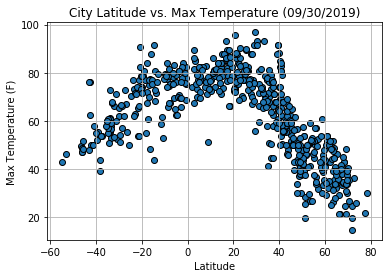

In [13]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')
plt.title("City Latitude vs. Max Temperature (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the plotted figures as .png
plt.savefig("Lat_vs_Temp_plot.png")
plt.show()

#### Latitude vs. Humidity Plot

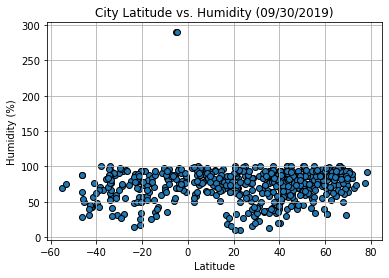

In [14]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')
plt.title("City Latitude vs. Humidity (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the plotted figures as .png
plt.savefig("Lat_vs_Humid_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

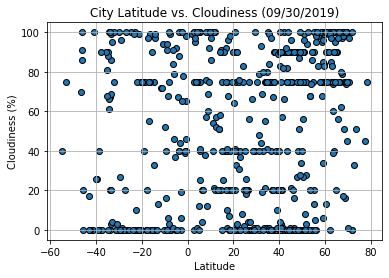

In [15]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')
plt.title("City Latitude vs. Cloudiness (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the plotted figures as .png
plt.savefig("Lat_vs_Cloud_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

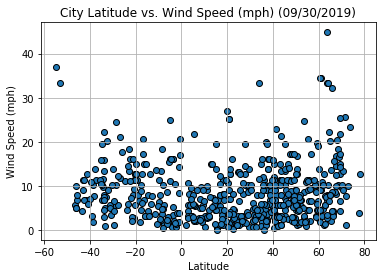

In [16]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')
plt.title("City Latitude vs. Wind Speed (mph) (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the plotted figures as .png
plt.savefig("Lat_vs_Wind_Plot.png")
plt.show()